<a href="https://colab.research.google.com/github/sh4rkd/procesamiento_de_datos_con_python_fred_2021/blob/master/Sesion-06/Reto-04/concat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 4: Concatenación de `Series` y `DataFrames`

### 1. Objetivos:
    - Practicar la concatenación de `Series` y `DataFrames` usando `np.concat` y `pandas.DataFrame.append`
 
---
    
### 2. Desarrollo:

### a) Sumando ventas por producto y por mes

Eres el analista financiero de EyePoker Inc. Tienes 12 listas con datos. Cada lista contiene la cantidad de unidades vendidas por producto en un mes determinado.

Tienes también una lista con los nombres de los productos que ofrece la empresa. 

Tanto las listas de ventas como la lista de nombres están ordenadas igual. Eso quiere decir que cada índice de cada lista pertenece a datos del mismo producto (es decir, `ventas_enero[3]`, `ventas_febrero[3]`, `ventas_marzo[3]`, `ventas_abril[3]`, etc, todas pertenecen al producto en `productos[3]`).

Tu reto es el siguiente:

1. Convierte las listas es `Series` de pandas.
2. Concatena horizontalmente las `Series` de ventas de manera que cada fila del `DataFrame` resultante corresponda al mismo producto.
3. En alguno de los pasos anteriores, agrega los nombres de los productos como índice.
4. Crea una nueva columna llamada `total_por_producto` que contenga la suma horizontal de las ventas mensuales de cada producto (es decir, un resumen de las ventas del año por producto).
5. (Opcional) Agrega también una fila hasta el final que tenga como índice `total_por_mes` que contenga la suma vertical de las ventas de cada mes (la última celda va a ser la suma total de las ventas de todos los productos en todo el año).

> **Tip**: Si quieres hacer el paso número 5, busca en Google el método `pandas.DataFrame.append`.

In [1]:
# Realiza aquí los imports que necesites
import pandas as pd
import numpy as np

In [2]:
productos = ["Pokemaster", "Cegatron", "Pikame Mucho", "Lazarillo de Tormes", "Stevie Wonder", "Needle", "El AyMeDuele", "El Desretinador", "Sacamel Ojocles", "Desojado", "Maribel Buenas Noches", "Cíclope", "El Cuatro Ojos"]

ventas_enero = [3, 5, 4, 45, 2, 32, 7, 89, 7, 6, 24, 51, 12]
ventas_febrero = [7, 9, 0, 76, 4, 34, 1, 2, 34, 67, 8, 9, 0]
ventas_marzo = [1, 1, 3, 56, 7, 98, 2, 34, 1, 0, 23, 1, 12]
ventas_abril = [2, 34, 2, 1, 56, 78, 23, 3, 4, 23, 1, 78, 9]
ventas_mayo = [1, 2, 32, 4, 32, 1, 45, 67, 87, 8, 9, 45, 2]
ventas_junio = [1, 2, 32, 1, 45, 78, 8, 90, 0, 98, 7, 46, 15]
ventas_julio = [15, 62, 37, 85, 5, 8, 9, 0, 75, 36, 52, 15, 12]
ventas_agosto = [1, 2, 32, 4, 35, 6, 78, 43, 45, 12, 34, 67, 89]
ventas_septiembre = [9, 87, 7, 6, 56, 7, 0, 34, 23, 1, 2, 51, 35]
ventas_octubre = [16, 62, 75, 58, 97, 6, 9, 0, 98, 78, 2, 3, 4]
ventas_noviembre = [1, 3, 2, 1, 4, 5, 2, 4, 7, 8, 4, 3, 5]
ventas_diciembre = [7, 9, 0, 6, 3, 7, 3, 85, 9, 7, 8, 0, 9]

In [14]:


# Asigna tu resultado final a esta variable
meses = ["enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"]
lista_de_series = [pd.Series(eval("ventas_"+meses[i]),index=productos,name=meses[i]) for i in range(12)]
ventas_dataframe = pd.concat(lista_de_series,axis=1)
ventas_dataframe["total_por_producto"] = ventas_dataframe.sum(axis=1)
total_por_mes = pd.Series(ventas_dataframe.sum(axis=0),name="total_por_mes")
ventas_dataframe = ventas_dataframe.append(total_por_mes)


Pídele a tu experta la función de verificación `revisar_dataframe` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado:

Felicidades! El procedimiento fue realizado correctamente.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


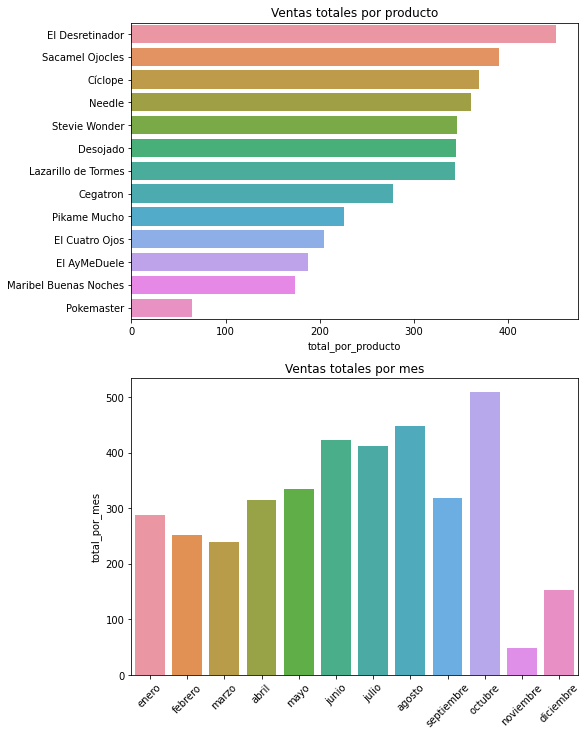

In [15]:
# Pega aquí la función de verificación
def revisar_dataframe(ventas_dataframe, productos, ventas_enero, ventas_febrero, ventas_marzo, ventas_abril, ventas_mayo,
                      ventas_junio, ventas_julio, ventas_agosto, ventas_septiembre,
                      ventas_octubre, ventas_noviembre, ventas_diciembre):
    
    import pandas as pd
    
    def concatenar_listas_horizontalmente(lista_de_listas, indice):
    
        meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre',
                'diciembre']

        lista_de_series = []
        for i in range(len(lista_de_listas)):
            lista_de_series.append(pd.Series(lista_de_listas[i], index=indice, name=meses[i]))

        dataframe = pd.concat(lista_de_series, axis=1)
        return dataframe
    
    ventas_dataframe_2 = concatenar_listas_horizontalmente([ventas_enero, ventas_febrero, ventas_marzo, ventas_abril, ventas_mayo,
                                                      ventas_junio, ventas_julio, ventas_agosto, ventas_septiembre,
                                                      ventas_octubre, ventas_noviembre, ventas_diciembre], productos)
    ventas_dataframe_2['total_por_producto'] = ventas_dataframe_2.sum(axis=1)
    total_por_mes = ventas_dataframe_2.sum(axis=0)
    total_por_mes.name = 'total_por_mes'
    ventas_dataframe_2 = ventas_dataframe_2.append(total_por_mes)
    
    if ventas_dataframe.equals(ventas_dataframe_2):
        print(f'Felicidades! El procedimiento fue realizado correctamente.')
        import seaborn as sns
        import matplotlib.pyplot as plt
        
        fig, axs = plt.subplots(2, 1, figsize=(8, 12))
        sin_total_por_mes = ventas_dataframe.drop(index='total_por_mes')
        sin_total_por_mes.sort_values('total_por_producto', ascending=False, inplace=True)
        axs[0].set_title('Ventas totales por producto')
        sns.barplot(sin_total_por_mes['total_por_producto'], sin_total_por_mes.index, ax=axs[0])
        
        axs[1].set_title('Ventas totales por mes')
        sin_total_por_producto = ventas_dataframe.drop(columns='total_por_producto')
        sns.barplot(sin_total_por_producto.columns, sin_total_por_producto.loc['total_por_mes'], orient='v', ax=axs[1])
        for item in axs[1].get_xticklabels():
            item.set_rotation(45)
        
    else:
        print(f'Hubo un error!\n')
        print('Dataframe esperado:')
        print(ventas_dataframe_2)
        print('\nDataframe recibido:')
        print(ventas_dataframe)

revisar_dataframe(ventas_dataframe, productos, ventas_enero, ventas_febrero, ventas_marzo, ventas_abril, ventas_mayo,
                      ventas_junio, ventas_julio, ventas_agosto, ventas_septiembre,
                      ventas_octubre, ventas_noviembre, ventas_diciembre)